In [4]:
from dataloaders.pmnist import get
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets,transforms
from sklearn.utils import shuffle
import math
torch.random.manual_seed(0) 
import torch.nn.functional as F
from networks.power_spherical import PowerSpherical
from approaches.direction_ucl import Appr
from networks.mlp_direction_ucl import Model
from dataloaders.pmnist import get
from torch.distributions import LogNormal, Normal, Bernoulli
from copy import deepcopy 
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

cuda


torch.Size([10000])


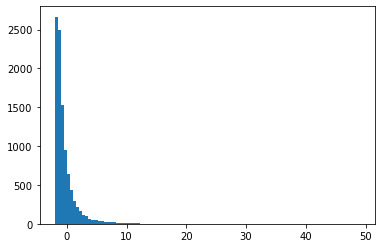

In [25]:
m = LogNormal(0, 1)
x = m.sample(torch.Size([10000])) + -2
print(x.shape)
a = plt.hist(x.cpu().numpy(), bins=100)

In [14]:
weight = nn.Linear(3,3)(torch.rand(3,3))
# print(weight.data)
print(torch.cat([weight, torch.zeros(3,5)], dim = -1))

tensor([[-0.7077,  0.4038,  0.3765,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.8361,  0.3083,  0.0789,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.7968,  0.6082,  0.3411,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       grad_fn=<CatBackward>)


In [3]:
# model = Model(ratio=0.5, eps=0.1).cuda()
# appr = Appr(model, model_name='mlp', data_name='pMNIST', lr=0.001, sbatch=256, optim='Adam')
# model.load_state_dict(torch.load('./trained_model/{}_task_{}.model'.format(appr.file_name, 0)))
# appr.model_old = deepcopy(appr.get_model(appr.model))
# model.load_state_dict(torch.load('./trained_model/{}_task_{}.model'.format(appr.file_name, 1)))
layer = model.fc3
saver_layer = appr.model_old['fc3']
mu = layer.rad_mu
sigma = F.softplus(layer.rad_rho)
q = LogNormal(mu, sigma)
# print(q.mean)
print(saver_layer['rad_mu'])
print(F.softplus(saver_layer['rad_rho']))
print(mu)
print(sigma)
# print(q.variance)
# print(mu - sigma ** 2)

tensor([[0.3623],
        [0.3521],
        [0.3482],
        [0.2130],
        [0.1870],
        [0.2717],
        [0.3028],
        [0.2843],
        [0.2850],
        [0.1708]], device='cuda:0')
tensor([[0.0284],
        [0.0264],
        [0.0226],
        [0.0218],
        [0.0246],
        [0.0237],
        [0.0234],
        [0.0221],
        [0.0254],
        [0.0217]], device='cuda:0')
Parameter containing:
tensor([[0.3606],
        [0.3653],
        [0.3402],
        [0.2014],
        [0.1825],
        [0.2638],
        [0.3069],
        [0.2868],
        [0.2776],
        [0.1767]], device='cuda:0', requires_grad=True)
tensor([[0.0257],
        [0.0238],
        [0.0214],
        [0.0204],
        [0.0229],
        [0.0208],
        [0.0215],
        [0.0216],
        [0.0243],
        [0.0191]], device='cuda:0', grad_fn=<SoftplusBackward>)


In [ ]:
data = get('MNIST')
xtrain = [data[t]['train']['x'] for t in data]
ytrain = [data[t]['train']['y'] for t in data]
xtrain = torch.cat(xtrain)
ytrain = torch.cat(ytrain)

xvalid = [data[t]['valid']['x'] for t in data]
yvalid = [data[t]['valid']['y'] for t in data]
xvalid = torch.cat(xvalid)
yvalid = torch.cat(yvalid)

# model = Model(3, 200)
# appr = Appr(model, 'normal',is_bayesian=True, sbatch=128, lr=0.01)
# with torch.autograd.set_detect_anomaly(True):
#     appr.train(xtrain, ytrain, xvalid, yvalid)

In [ ]:
total_var = 2 / 400
noise_var = total_var * 0.001
mu_var = total_var - noise_var
        
noise_std, mu_std = math.sqrt(noise_var), math.sqrt(mu_var)
bound = math.sqrt(3.0) * mu_std
rho_init = np.log(np.exp(noise_std)-1)
print(noise_std, bound)
from torch.distributions import Normal
print(Normal(0, noise_std).rsample())


In [1]:
from approaches.direction_ucl import Appr
from networks.mlp_direction_ucl import Model
from dataloaders.pmnist import get
from copy import deepcopy 
import torch

# from networks.mlp import Model
data = get(tasknum=10, seed=23081999)
model = Model(ratio=0.5, eps=0.1).cuda()
appr = Appr(model, model_name='mlp', data_name='pMNIST', lr=0.001, sbatch=256, optim='Adam')
appr.model.load_state_dict(torch.load('./trained_model/{}_task_{}.model'.format(appr.file_name, 0)))
appr.model_old = deepcopy(appr.get_model(appr.model))
appr.saved = 1
x_test = data[0]['test']['x'].cuda()
y_test = data[0]['test']['y'].cuda()
print('test acc:', appr.eval(x_test, y_test)[-1])
for t in data.keys():
    if t == 0: continue
    x_train = data[t]['train']['x'].cuda()
    y_train = data[t]['train']['y'].cuda()

    x_valid = data[t]['valid']['x'].cuda()
    y_valid = data[t]['valid']['y'].cuda()

    appr.train(t, x_train, y_train, x_valid, y_valid)
    test_accs = []
    for i in range(t+1):
        x_test = data[i]['test']['x'].cuda()
        y_test = data[i]['test']['y'].cuda()
        test_accs.append(str(appr.eval(x_test, y_test)[-1]))
    
    log_str = ' '.join(test_accs)
    print('test acc:', log_str)

concentration init 3699.4736842105276
sigma init 0.03571428571428571 mu init 0.06185895741317418
concentration init 1880.526315789474
sigma init 0.05 mu init 0.08660254037844387
concentration init 1880.526315789474
sigma init 0.05 mu init 0.08660254037844387
test acc: 0.9848
| Epoch   1, time=2890.7ms/503.6ms | Train: loss=0.152, acc=95.43% | Valid: loss=0.165, acc=95.14% | *
| Epoch   2, time=2829.1ms/535.8ms | Train: loss=0.104, acc=96.82% | Valid: loss=0.126, acc=95.89% | *
| Epoch   3, time=2880.5ms/507.2ms | Train: loss=0.073, acc=97.64% | Valid: loss=0.104, acc=96.81% | *
| Epoch   4, time=2790.6ms/493.5ms | Train: loss=0.050, acc=98.44% | Valid: loss=0.086, acc=97.45% | *
| Epoch   5, time=2816.9ms/510.3ms | Train: loss=0.045, acc=98.59% | Valid: loss=0.082, acc=97.62% | *
| Epoch   6, time=2859.2ms/500.4ms | Train: loss=0.043, acc=98.64% | Valid: loss=0.086, acc=97.50% |
| Epoch   7, time=2960.0ms/530.5ms | Train: loss=0.036, acc=98.85% | Valid: loss=0.079, acc=97.66% | *
| Epo

KeyboardInterrupt: 

In [1]:
from approaches.normal import Appr
from networks.mlp import Model as Model
from dataloaders.pmnist import get
import torch
from torch.nn.functional import softplus
import torch.nn.functional as F

# from networks.mlp import Model
data = get(tasknum=10, seed=23081999)
model = Model().cuda()
appr = Appr(model, is_bayesian=False, lr=0.001, sbatch=256, optim='Adam')

x_train = data[0]['train']['x'].cuda()
y_train = data[0]['train']['y'].cuda()

x_valid = data[0]['valid']['x'].cuda()
y_valid = data[0]['valid']['y'].cuda()

x_test = data[0]['test']['x'].cuda()
y_test = data[0]['test']['y'].cuda()



In [2]:
appr.train(x_train, y_train, x_valid, y_valid)
print('test acc:', appr.eval(x_test, y_test))

| Epoch   1, time=595.8ms/166.5ms | Train: loss=0.230, acc=93.04% | Valid: loss=0.248, acc=92.63% | *
| Epoch   2, time=390.9ms/159.1ms | Train: loss=0.143, acc=95.70% | Valid: loss=0.165, acc=95.08% | *
| Epoch   3, time=385.5ms/172.8ms | Train: loss=0.110, acc=96.72% | Valid: loss=0.133, acc=96.16% | *
| Epoch   4, time=380.4ms/164.6ms | Train: loss=0.080, acc=97.58% | Valid: loss=0.112, acc=96.69% | *
| Epoch   5, time=375.0ms/160.1ms | Train: loss=0.060, acc=98.21% | Valid: loss=0.099, acc=97.04% | *
| Epoch   6, time=372.6ms/163.5ms | Train: loss=0.049, acc=98.59% | Valid: loss=0.094, acc=97.20% | *
| Epoch   7, time=371.3ms/160.1ms | Train: loss=0.039, acc=98.85% | Valid: loss=0.090, acc=97.28% | *
| Epoch   8, time=365.9ms/159.5ms | Train: loss=0.043, acc=98.65% | Valid: loss=0.102, acc=97.05% |
| Epoch   9, time=365.2ms/157.6ms | Train: loss=0.030, acc=99.11% | Valid: loss=0.094, acc=97.18% |
| Epoch  10, time=373.4ms/155.6ms | Train: loss=0.019, acc=99.46% | Valid: loss=0.083,

In [3]:
import torch
from torch.nn.functional import softplus
import torch.nn.functional as F
from networks.mlp import LinearSparse
i = [100]
x = x_train[i]
x = x.view(x.size(0), -1)
y = y_train[i]
print(y)

for m in model.modules():
    if isinstance(m, torch.nn.Linear):
#         print(F.relu(m.mask_layer(x)).shape)
        x = F.relu(m(x))
        print((x==0).float().sum())
        print(max(x[0]))


tensor([0], device='cuda:0')
tensor(199., device='cuda:0')
tensor(14.9500, device='cuda:0', grad_fn=<UnbindBackward>)
tensor(184., device='cuda:0')
tensor(20.5522, device='cuda:0', grad_fn=<UnbindBackward>)
tensor(4., device='cuda:0')
tensor(14.5686, device='cuda:0', grad_fn=<UnbindBackward>)


tensor(122., device='cuda:0')


(array([277.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        123.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

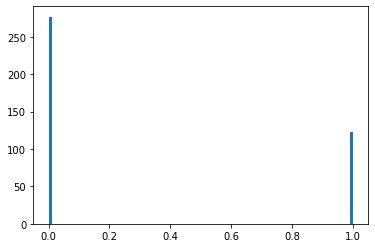

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
mask = torch.sigmoid(400*model.mask1).squeeze()
print((mask==1).float().sum())
plt.hist(mask.cpu().detach().numpy(), bins=100)

torch.Size([50000, 784])
torch.Size([50000, 400])
torch.Size([400])
torch.Size([400])
tensor(37., device='cuda:0')
tensor(13.9359, device='cuda:0', grad_fn=<UnbindBackward>) tensor(0., device='cuda:0', grad_fn=<UnbindBackward>)
tensor(2., device='cuda:0')
tensor(54.6328, device='cuda:0', grad_fn=<UnbindBackward>) tensor(0., device='cuda:0', grad_fn=<UnbindBackward>)


(array([140., 121.,  56.,  24.,  16.,   6.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   1.,   2.,   1.,   1.,   0.,   0.,
          3.,   1.,   0.,   3.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,
          1.,   2.,   1.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.        ,  0.1393588 ,  0.2787176 ,  0.4180764 ,  0.5574352 ,
         0.696794  ,  0.8361528 ,  0.97551155,  1.1148704 ,  1.2542292 ,
         1.393588  ,  1.5329468 ,  1.6723056 ,  1.8116643 ,  1.9510231 ,
         2.0903819 ,  2.2297409 ,  2.3690996 ,  2.5084584 ,  2.6478171 ,
         2.787176  ,  2.92

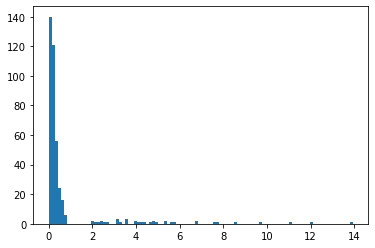

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# r = np.arange(x.size(0))
# r = torch.LongTensor(r)
x = x_train.view(x_train.size(0), -1)
print(x.shape)
out1 = F.relu(model.fc1(x))
out2 = F.relu(model.fc2(out1))
out3 = model.fc3(out2)
# for i in range(0,len(r),self.sbatch):
#     if i+self.sbatch<=len(r): b=r[i:i+self.sbatch]
#     else: b=r[i:]
#     images=x[b].to(device)
#     targets=y[b].to(device)
out = out1
print(out.shape)
var = torch.var(out, dim=0)
print(var.shape)
# print(var)
mean = torch.mean(out, dim=0)
print(mean.shape)
# print(mean)
print((mean > 1).float().sum())
print(max(mean), min(mean))
print((var==0).float().sum())
print(max(var), min(var))
plt.hist(mean.cpu().detach().numpy(), bins=100)
# plt.hist(var.cpu().detach().numpy(), bins=100)
# print(model.fc3(mean))
# print(torch.mean(out3, dim=0))

In [59]:
import torch
from torch.nn.functional import softplus
import torch.nn.functional as F
x = x_train[:1]
x = x.view(x.size(0), -1)
print(x.shape)
layer = model.fc1
# print(softplus(layer.dir_softplus_inv_concentration))
rad = F.relu(layer.rad_layer(x))
print(rad)

torch.Size([1, 784])


ModuleAttributeError: 'Linear' object has no attribute 'rad_layer'

In [4]:
import torch.nn.functional as F
def ml_kappa(dim, eps):
    return (max(4, dim) - 3.0) / (1.0 - (1.0 - eps) ** 2) * (1.0 - eps)

# print(ml_kappa(400, 0.1))
layer = model.fc2
rho = layer.rad_rho
con = layer.dir_softplus_inv_concentration
print(F.softplus(rho))
print(F.softplus(con))

tensor([[0.0482],
        [0.0391],
        [0.0483],
        [0.0492],
        [0.0503],
        [0.0448],
        [0.0437],
        [0.0474],
        [0.0436],
        [0.0480],
        [0.0502],
        [0.0505],
        [0.0490],
        [0.0498],
        [0.0480],
        [0.0486],
        [0.0463],
        [0.0509],
        [0.0468],
        [0.0465],
        [0.0468],
        [0.0477],
        [0.0499],
        [0.0478],
        [0.0458],
        [0.0507],
        [0.0546],
        [0.0486],
        [0.0454],
        [0.0446],
        [0.0402],
        [0.0589],
        [0.0530],
        [0.0487],
        [0.0410],
        [0.0487],
        [0.0516],
        [0.0519],
        [0.0488],
        [0.0482],
        [0.0459],
        [0.0403],
        [0.0484],
        [0.0495],
        [0.0446],
        [0.0508],
        [0.0390],
        [0.0539],
        [0.0459],
        [0.0491],
        [0.0454],
        [0.0450],
        [0.0398],
        [0.0494],
        [0.0463],
        [0

In [ ]:
model = Net().cuda()
model.train()
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
ce = torch.nn.CrossEntropyLoss()
x_train = data[0]['train']['x'][:10].cuda()
y_train = data[0]['train']['y'][:10].cuda()
pred = model(x_train)
optim.zero_grad()
loss = ce(pred, y_train)
print(loss)
loss.backward()
for n, p in model.named_parameters():
    print(n, p.grad)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
imshow(data[9]['train']['x'][])

In [2]:
import torch
import math 
from networks.kl_divergence import KL_vMF_kappa_full, KL_Powerspherical
import torch.nn.functional as F
from networks.power_spherical import PowerSpherical
# model = Model(ratio=0.5, eps=0.1).cuda()
# appr = Appr(model, model_name='mlp', data_name='pMNIST', lr=0.001, sbatch=256, optim='Adam')
# appr.model.load_state_dict(torch.load('./trained_model/{}_task_{}.model'.format(appr.file_name, 0)))
# appr.model_old = deepcopy(appr.get_model(appr.model))
# appr.saved = 1
loc = model.fc3.dir_loc
prev_loc = appr.model_old['fc3']['dir_loc']
scale = F.softplus(model.fc3.dir_softplus_inv_concentration)
prev_scale = F.softplus(appr.model_old['fc3']['dir_softplus_inv_concentration'])
# print((loc*loc).sum(-1))
# print((prev_loc*prev_loc).sum(-1))

print((prev_loc*loc).sum(-1))
print(prev_loc.norm(2, dim=-1))
print(loc)
print(prev_scale)
print(scale)
q = PowerSpherical(loc, scale)
p = PowerSpherical(prev_loc, prev_scale)
alpha = q.base_dist.marginal_t.base_dist.concentration1
beta = q.base_dist.marginal_t.base_dist.concentration0
# print(alpha)
# print(beta)
# print(torch.lgamma(alpha))
# print(torch.lgamma(alpha + beta))
# sample = q.rsample()
# print(sample)
# print((math.log(2) + torch.digamma(alpha) - torch.digamma(alpha + beta)))
# print(torch.log1p((loc * loc).sum(-1)))
# print(q.log_normalizer())
# print(torch.lgamma(alpha) - torch.lgamma(alpha + beta))
# print(q.log_prob(sample))
print(-q.entropy()-q.log_prob(loc))
print(KL_Powerspherical(q, p))

tensor([0.8920, 0.9069, 0.9083, 0.9307, 0.9245, 0.9398, 0.9151, 0.9204, 0.9212,
        0.9301], device='cuda:0', grad_fn=<SumBackward1>)
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], device='cuda:0')
Parameter containing:
tensor([[-0.0544, -0.0115, -0.0181,  ..., -0.0513,  0.0312, -0.0156],
        [ 0.0057, -0.0028, -0.0063,  ..., -0.0583, -0.0008,  0.0895],
        [-0.0698, -0.0424,  0.0063,  ..., -0.0328, -0.0150,  0.0976],
        ...,
        [ 0.0920, -0.0196, -0.0246,  ..., -0.0696, -0.0038, -0.0253],
        [-0.0764,  0.0008, -0.0113,  ...,  0.1081, -0.0230, -0.0159],
        [ 0.0946,  0.0016, -0.0639,  ...,  0.0980, -0.0085,  0.0063]],
       device='cuda:0', requires_grad=True)
tensor([1880.9163, 1880.8918, 1881.0278, 1880.9973, 1880.9521, 1881.0879,
        1880.9596, 1881.0292, 1881.0919, 1881.0527], device='cuda:0')
tensor([1881.0145, 1881.0060, 1881.1832, 1881.1527, 1881.0667, 1881.2095,
        1881.0851, 1881.1855, 

In [ ]:
from torch.distributions import Normal
import math
import torch
import matplotlib.pyplot as plt
import numpy as np

n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
a = Normal(0, 1)
b = Normal(2, 2)

x = a.sample((100000,)) + b.sample((100000, ))*2
y = b.sample((100000, ))
x = x.numpy()
y = y.numpy()
# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
plt.hist(x, bins=100)
plt.hist(y, bins=100)
print()